# Explaining Models with Shap

## Joseph LIm

## Loading in Data and Libraries

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import shap
from lime.lime_tabular import LimeTabularExplainer

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
loaded_joblib = joblib.load('dec_tree.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTree'])

In [4]:
X_train = loaded_joblib["X_train"]
X_test = loaded_joblib["X_test"]
y_train = loaded_joblib["y_train"]
y_test = loaded_joblib["y_test"]

preprocessor = loaded_joblib["preprocessor"]
LinearRegression = loaded_joblib["LinearRegression"]
DecisionTree = loaded_joblib["DecisionTree"]

## Explaining Tree Based model with Shap

In [5]:
X_shap = shap.sample(X_train,nsamples=400,random_state=321)
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Identifier_DRA24  \
3888        15.85         0.110653   36.9506                    0.0   
2497        15.10         0.087407  221.8456                    0.0   
7723        17.50         0.015592  184.8266                    0.0   
8117        10.80         0.049820  243.2144                    0.0   
7475        15.00         0.044999  140.4838                    0.0   

      Item_Identifier_DRA59  Item_Identifier_DRB01  Item_Identifier_DRB13  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRB24  Item_Identifier_DRB25  Item_Identifier_DRB48  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRC01  Item_Identifier_DRC12  Item_Identifier_DRC13  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRC25  Item_Identifier_DRC27  Item_Identifier_DRC36  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRC49  Item_Identifier_DRD01  Item_Identifier_DRD12  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRD13  Item_Identifier_DRD15  Item_Identifier_DRD24  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRD25  Item_Identifier_DRD27  Item_Identifier_DRD37  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0                    0.0                    0.0   
7475                    0.0                    0.0                    0.0   

      Item_Identifier_DRD49  Item_Identifier_DRD60  Item_Identifier_DRE01  \
3888                    0.0                    0.0                    0.0   
2497                    0.0                    0.0                    0.0   
7723                    0.0                    0.0                    0.0   
8117                    0.0   

In [6]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

In [7]:
#Creating model explainer
explainer = shap.Explainer(DecisionTree)
explainer

In [8]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(400, 1593)

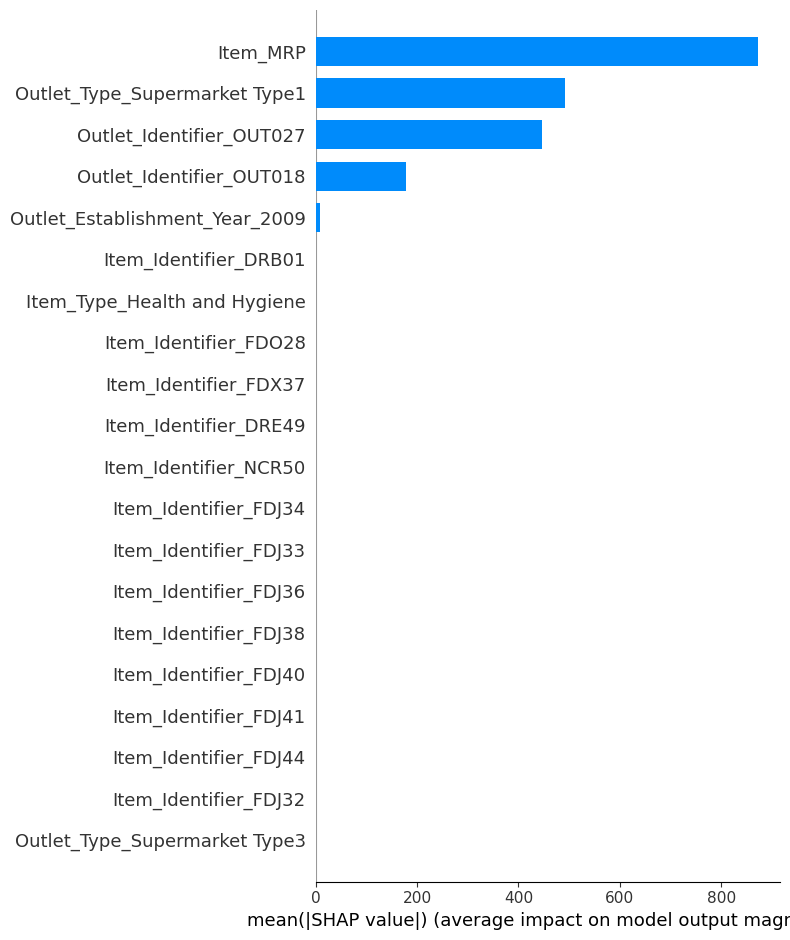

In [9]:
fig, ax = plt.subplots(figsize = (20, 20))
shap.summary_plot(shap_values, X_shap, plot_type = "bar")
ax.set_title('Summary Plot - Item Sales');
fig.savefig('summary_plot_1.png')

![image here]("DecTree5MIF.png")

According to the SHAP and the feature importance image, all of the most important features are the same.

In [10]:
#Saving Figure
plt.savefig("SHAPSummaryBar.png")

<Figure size 640x480 with 0 Axes>

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


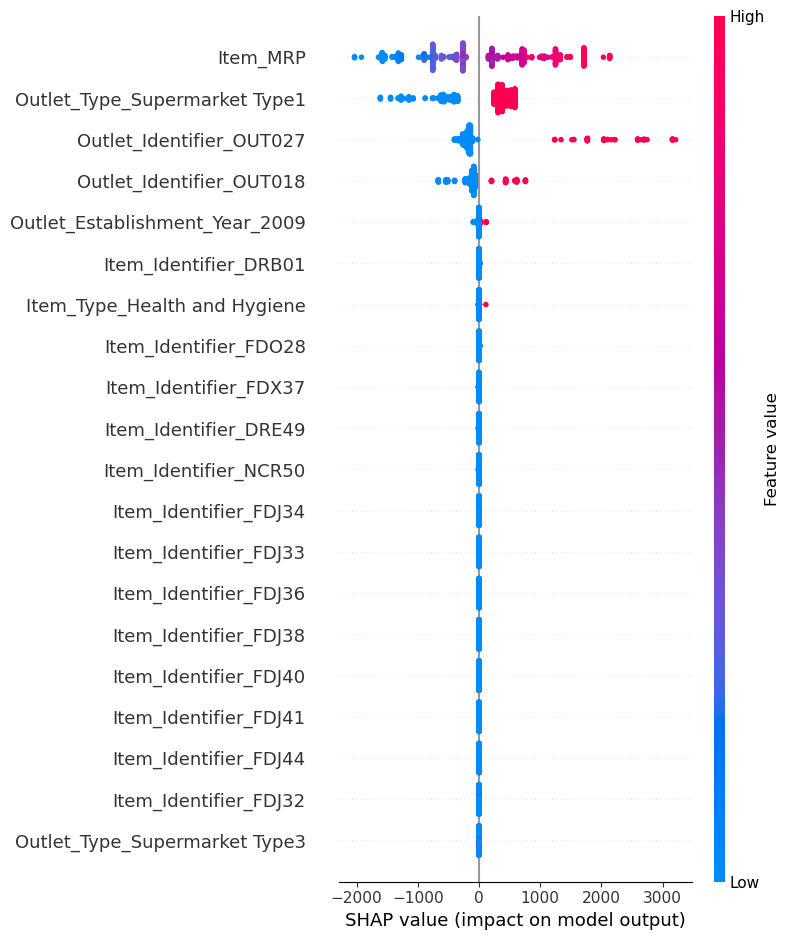

In [11]:
fig, ax = plt.subplots(figsize = (20, 20))
shap.summary_plot(shap_values, X_shap, plot_type = "dot")
ax.set_title('Summary Plot - Item Sales');
fig.savefig('SHAPSummaryDot.png')

The 3 most important features and how they impact the model's predictions are as follows:
1. Item MRP, which seems to have a positive impact on the model's predictions
2. Whether the item came from a supermarket outlet, which also has a positive impact on the model's predictions
3. Whether the item came from a specific outlet, which also has a positive impact on the model's predictions.

## Local Explanations




Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week.

Explain why you selected the examples that you did.
If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).

For each example, produce :

a Lime tabular explanation

Interpret what features most heavily influenced the predictions, according to LIME.

Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.

an Individual Force Plot

Interpret what features most heavily influenced the predictions, according to SHAP.

Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.


In [12]:
X_train.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Identifier_DRA24  \
4776       16.350         0.029565  256.4646                    0.0   
7510       15.250         0.000000  179.7660                    0.0   
5828       12.350         0.158716  157.2946                    0.0   
5327        7.975         0.014628   82.3250                    0.0   
4810       19.350         0.016645  120.9098                    0.0   

      Item_Identifier_DRA59  Item_Identifier_DRB01  Item_Identifier_DRB13  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRB24  Item_Identifier_DRB25  Item_Identifier_DRB48  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRC01  Item_Identifier_DRC12  Item_Identifier_DRC13  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRC25  Item_Identifier_DRC27  Item_Identifier_DRC36  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRC49  Item_Identifier_DRD01  Item_Identifier_DRD12  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRD13  Item_Identifier_DRD15  Item_Identifier_DRD24  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRD25  Item_Identifier_DRD27  Item_Identifier_DRD37  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRD49  Item_Identifier_DRD60  Item_Identifier_DRE01  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0   

In [13]:
X_shap.columns
row = 68

In [14]:
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

In [15]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               DecisionTree.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


### Local Explanation 1

I would like to do more investigation on Outlet 027. Why did it make more money than Outlet 18?
Outlet 27

In [16]:
X_train.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Identifier_DRA24  \
4776       16.350         0.029565  256.4646                    0.0   
7510       15.250         0.000000  179.7660                    0.0   
5828       12.350         0.158716  157.2946                    0.0   
5327        7.975         0.014628   82.3250                    0.0   
4810       19.350         0.016645  120.9098                    0.0   

      Item_Identifier_DRA59  Item_Identifier_DRB01  Item_Identifier_DRB13  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRB24  Item_Identifier_DRB25  Item_Identifier_DRB48  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRC01  Item_Identifier_DRC12  Item_Identifier_DRC13  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRC25  Item_Identifier_DRC27  Item_Identifier_DRC36  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRC49  Item_Identifier_DRD01  Item_Identifier_DRD12  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRD13  Item_Identifier_DRD15  Item_Identifier_DRD24  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRD25  Item_Identifier_DRD27  Item_Identifier_DRD37  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   

      Item_Identifier_DRD49  Item_Identifier_DRD60  Item_Identifier_DRE01  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0   

In [17]:
outlet27_X = X_train[X_train["Outlet_Identifier_OUT027"] == 1]
outlet27_y = y_train.loc[outlet27_X.index]
explainer = shap.Explainer(DecisionTree)

shap_values27 = explainer(outlet27_X, outlet27_y)

In [18]:
lime_explainer =LimeTabularExplainer(training_data=outlet27_X.values, feature_names=outlet27_X.columns, mode='regression')
lime_explainer

In [19]:
exp = lime_explainer.explain_instance(X_shap,
                               DecisionTree.predict)
exp.show_in_notebook()

InvalidIndexError: (slice(None, None, None), 0)

### Local Explanation 2

I would like to do more investigation on Outlet 18. Why did it make less money than Outlet 27?

In [ ]:
outlet18 = X_train[X_train["Outlet_Identifier_OUT018"] == 1]